# Itô Calculus Basics

## Introduction

Itô calculus is a branch of stochastic calculus that provides the mathematical framework for integrating with respect to stochastic processes, particularly Brownian motion (Wiener process). Named after Japanese mathematician Kiyosi Itô, this calculus is fundamental to mathematical finance, physics, and engineering.

## The Wiener Process (Brownian Motion)

A standard Wiener process $W_t$ is a continuous-time stochastic process with the following properties:

1. $W_0 = 0$ (starts at zero)
2. $W_t$ has independent increments
3. $W_t - W_s \sim \mathcal{N}(0, t-s)$ for $0 \leq s < t$
4. $W_t$ has continuous sample paths

## The Itô Integral

For a stochastic process $f(t, \omega)$ adapted to the filtration generated by $W_t$, the Itô integral is defined as:

$$I(f) = \int_0^T f(t, \omega) \, dW_t$$

This integral is constructed as the limit of Riemann-type sums where the integrand is evaluated at the **left endpoint** of each subinterval:

$$\int_0^T f(t) \, dW_t = \lim_{n \to \infty} \sum_{i=0}^{n-1} f(t_i)(W_{t_{i+1}} - W_{t_i})$$

## Itô's Lemma

The cornerstone of Itô calculus is **Itô's Lemma**, which is the stochastic analog of the chain rule. For a twice continuously differentiable function $f(t, X_t)$ where $X_t$ follows the stochastic differential equation (SDE):

$$dX_t = \mu(t, X_t) \, dt + \sigma(t, X_t) \, dW_t$$

Itô's Lemma states:

$$df(t, X_t) = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial x} dX_t + \frac{1}{2} \frac{\partial^2 f}{\partial x^2} (dX_t)^2$$

Using the rules $(dt)^2 = 0$, $dt \cdot dW_t = 0$, and $(dW_t)^2 = dt$, this simplifies to:

$$df = \left( \frac{\partial f}{\partial t} + \mu \frac{\partial f}{\partial x} + \frac{1}{2} \sigma^2 \frac{\partial^2 f}{\partial x^2} \right) dt + \sigma \frac{\partial f}{\partial x} dW_t$$

## Key Properties of Itô Integrals

1. **Zero Mean**: $\mathbb{E}\left[\int_0^T f(t) \, dW_t\right] = 0$

2. **Itô Isometry**: $\mathbb{E}\left[\left(\int_0^T f(t) \, dW_t\right)^2\right] = \mathbb{E}\left[\int_0^T f(t)^2 \, dt\right]$

3. **Martingale Property**: The Itô integral $M_t = \int_0^t f(s) \, dW_s$ is a martingale

## A Surprising Result: $\int_0^T W_t \, dW_t$

Unlike ordinary calculus where $\int x \, dx = \frac{x^2}{2}$, the Itô integral yields:

$$\int_0^T W_t \, dW_t = \frac{1}{2}W_T^2 - \frac{1}{2}T$$

The extra term $-\frac{1}{2}T$ arises from the quadratic variation of Brownian motion and is a hallmark of Itô calculus.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
T = 1.0          # Total time
N = 10000        # Number of time steps
dt = T / N       # Time step size
n_paths = 5000   # Number of Monte Carlo paths

print("Itô Calculus Numerical Demonstration")
print("=" * 40)
print(f"Time horizon: T = {T}")
print(f"Time steps: N = {N}")
print(f"Step size: dt = {dt}")
print(f"Monte Carlo paths: {n_paths}")

Itô Calculus Numerical Demonstration
Time horizon: T = 1.0
Time steps: N = 10000
Step size: dt = 0.0001
Monte Carlo paths: 5000


## Numerical Simulation of Brownian Motion

We simulate Brownian motion using the Euler-Maruyama discretization:

$$W_{t+\Delta t} = W_t + \sqrt{\Delta t} \cdot Z$$

where $Z \sim \mathcal{N}(0, 1)$ is a standard normal random variable.

In [2]:
def simulate_brownian_motion(T, N, n_paths):
    """
    Simulate multiple paths of standard Brownian motion.
    
    Parameters:
    -----------
    T : float
        Total time horizon
    N : int
        Number of time steps
    n_paths : int
        Number of independent paths
    
    Returns:
    --------
    t : ndarray
        Time grid of shape (N+1,)
    W : ndarray
        Brownian motion paths of shape (n_paths, N+1)
    dW : ndarray
        Brownian increments of shape (n_paths, N)
    """
    dt = T / N
    t = np.linspace(0, T, N + 1)
    
    # Generate Brownian increments
    dW = np.sqrt(dt) * np.random.randn(n_paths, N)
    
    # Construct paths via cumulative sum (W_0 = 0)
    W = np.zeros((n_paths, N + 1))
    W[:, 1:] = np.cumsum(dW, axis=1)
    
    return t, W, dW

# Generate Brownian motion paths
t, W, dW = simulate_brownian_motion(T, N, n_paths)

print(f"Generated {n_paths} Brownian motion paths")
print(f"Final values: mean = {W[:, -1].mean():.4f}, std = {W[:, -1].std():.4f}")
print(f"Theoretical: mean = 0, std = {np.sqrt(T):.4f}")

Generated 5000 Brownian motion paths
Final values: mean = -0.0137, std = 0.9850
Theoretical: mean = 0, std = 1.0000


## Verification of Itô's Result: $\int_0^T W_t \, dW_t = \frac{1}{2}W_T^2 - \frac{1}{2}T$

We numerically compute the Itô integral using left-point evaluation and verify the theoretical result.

In [3]:
def compute_ito_integral(W, dW):
    """
    Compute the Itô integral ∫W_t dW_t using left-point rule.
    
    Parameters:
    -----------
    W : ndarray
        Brownian motion paths of shape (n_paths, N+1)
    dW : ndarray
        Brownian increments of shape (n_paths, N)
    
    Returns:
    --------
    ito_integral : ndarray
        Values of ∫W_t dW_t for each path
    """
    # Itô integral: sum of W_{t_i} * (W_{t_{i+1}} - W_{t_i})
    # Using left-point evaluation (characteristic of Itô calculus)
    return np.sum(W[:, :-1] * dW, axis=1)

# Compute Itô integral for all paths
ito_integral = compute_ito_integral(W, dW)

# Theoretical value: (1/2)W_T^2 - (1/2)T
W_T = W[:, -1]
theoretical = 0.5 * W_T**2 - 0.5 * T

# Compare numerical and theoretical results
error = ito_integral - theoretical

print("Verification of Itô's Result: ∫W_t dW_t = (1/2)W_T² - (1/2)T")
print("=" * 55)
print(f"Mean numerical integral:   {ito_integral.mean():.6f}")
print(f"Mean theoretical value:    {theoretical.mean():.6f}")
print(f"Mean absolute error:       {np.abs(error).mean():.6f}")
print(f"Max absolute error:        {np.abs(error).max():.6f}")
print(f"\nExpected mean of integral: {-0.5*T:.6f} (since E[W_T²] = T)")

Verification of Itô's Result: ∫W_t dW_t = (1/2)W_T² - (1/2)T
Mean numerical integral:   -0.014832
Mean theoretical value:    -0.014745
Mean absolute error:       0.005617
Max absolute error:        0.028664

Expected mean of integral: -0.500000 (since E[W_T²] = T)


## Comparison: Itô vs Stratonovich Integrals

The **Stratonovich integral** uses the midpoint rule:

$$\int_0^T W_t \circ dW_t = \frac{1}{2}W_T^2$$

Unlike the Itô integral, the Stratonovich integral follows ordinary calculus rules. The relationship between them is:

$$\int_0^T W_t \circ dW_t = \int_0^T W_t \, dW_t + \frac{1}{2}[W, W]_T = \int_0^T W_t \, dW_t + \frac{1}{2}T$$

where $[W, W]_T = T$ is the quadratic variation.

In [4]:
def compute_stratonovich_integral(W, dW):
    """
    Compute the Stratonovich integral ∫W_t ○ dW_t using midpoint rule.
    
    Parameters:
    -----------
    W : ndarray
        Brownian motion paths of shape (n_paths, N+1)
    dW : ndarray
        Brownian increments of shape (n_paths, N)
    
    Returns:
    --------
    strat_integral : ndarray
        Values of ∫W_t ○ dW_t for each path
    """
    # Stratonovich integral: use midpoint (W_{t_i} + W_{t_{i+1}})/2
    midpoints = 0.5 * (W[:, :-1] + W[:, 1:])
    return np.sum(midpoints * dW, axis=1)

# Compute Stratonovich integral
strat_integral = compute_stratonovich_integral(W, dW)

# Theoretical Stratonovich result: (1/2)W_T^2
strat_theoretical = 0.5 * W_T**2

print("Comparison: Itô vs Stratonovich Integrals")
print("=" * 45)
print(f"\nItô integral ∫W_t dW_t:")
print(f"  Mean:       {ito_integral.mean():.6f}")
print(f"  Theoretical mean: {-0.5*T:.6f}")
print(f"\nStratonovich integral ∫W_t ○ dW_t:")
print(f"  Mean:       {strat_integral.mean():.6f}")
print(f"  Theoretical mean: {0:.6f}")
print(f"\nDifference (Stratonovich - Itô):")
print(f"  Mean:       {(strat_integral - ito_integral).mean():.6f}")
print(f"  Theoretical: {0.5*T:.6f} (= T/2, the quadratic variation correction)")

Comparison: Itô vs Stratonovich Integrals

Itô integral ∫W_t dW_t:
  Mean:       -0.014832
  Theoretical mean: -0.500000

Stratonovich integral ∫W_t ○ dW_t:
  Mean:       0.485255
  Theoretical mean: 0.000000

Difference (Stratonovich - Itô):
  Mean:       0.500088
  Theoretical: 0.500000 (= T/2, the quadratic variation correction)


## Itô Isometry Verification

The Itô isometry states that for a deterministic function $f(t)$:

$$\mathbb{E}\left[\left(\int_0^T f(t) \, dW_t\right)^2\right] = \int_0^T f(t)^2 \, dt$$

Let's verify this with $f(t) = t$, where:
$$\mathbb{E}\left[\left(\int_0^T t \, dW_t\right)^2\right] = \int_0^T t^2 \, dt = \frac{T^3}{3}$$

In [5]:
def compute_ito_integral_with_f(f_values, dW):
    """
    Compute the Itô integral ∫f(t) dW_t.
    
    Parameters:
    -----------
    f_values : ndarray
        Function values at time points, shape (N,)
    dW : ndarray
        Brownian increments, shape (n_paths, N)
    
    Returns:
    --------
    integral : ndarray
        Integral values for each path
    """
    return np.sum(f_values * dW, axis=1)

# Test with f(t) = t
f_t = t[:-1]  # f evaluated at left endpoints

# Compute ∫t dW_t for all paths
integral_t_dW = compute_ito_integral_with_f(f_t, dW)

# Itô isometry: E[(∫t dW_t)²] = ∫t² dt = T³/3
empirical_variance = np.mean(integral_t_dW**2)
theoretical_variance = T**3 / 3

print("Itô Isometry Verification: E[(∫t dW_t)²] = ∫t² dt = T³/3")
print("=" * 55)
print(f"Empirical E[(∫t dW_t)²]:  {empirical_variance:.6f}")
print(f"Theoretical T³/3:         {theoretical_variance:.6f}")
print(f"Relative error:           {abs(empirical_variance - theoretical_variance)/theoretical_variance * 100:.2f}%")
print(f"\nNote: E[∫t dW_t] = {integral_t_dW.mean():.6f} (should be ≈ 0)")

Itô Isometry Verification: E[(∫t dW_t)²] = ∫t² dt = T³/3
Empirical E[(∫t dW_t)²]:  0.330835
Theoretical T³/3:         0.333333
Relative error:           0.75%

Note: E[∫t dW_t] = -0.009067 (should be ≈ 0)


## Application: Geometric Brownian Motion and Itô's Lemma

Geometric Brownian Motion (GBM) is the foundation of the Black-Scholes model:

$$dS_t = \mu S_t \, dt + \sigma S_t \, dW_t$$

Applying Itô's Lemma to $f(S) = \ln(S)$:

$$d(\ln S_t) = \left(\mu - \frac{\sigma^2}{2}\right) dt + \sigma \, dW_t$$

This gives the exact solution:

$$S_t = S_0 \exp\left[\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t\right]$$

The drift adjustment $-\frac{\sigma^2}{2}$ is a direct consequence of Itô's Lemma!

In [6]:
def simulate_gbm_euler(S0, mu, sigma, T, N, n_paths, W):
    """
    Simulate GBM using Euler-Maruyama discretization.
    """
    dt = T / N
    S = np.zeros((n_paths, N + 1))
    S[:, 0] = S0
    
    dW = np.diff(W, axis=1)
    
    for i in range(N):
        S[:, i+1] = S[:, i] * (1 + mu * dt + sigma * dW[:, i])
    
    return S

def simulate_gbm_exact(S0, mu, sigma, T, N, n_paths, W):
    """
    Simulate GBM using the exact solution from Itô's Lemma.
    """
    t_grid = np.linspace(0, T, N + 1)
    drift = (mu - 0.5 * sigma**2) * t_grid
    S = S0 * np.exp(drift + sigma * W)
    return S

# GBM parameters
S0 = 100      # Initial stock price
mu = 0.1      # Drift (10% annual return)
sigma = 0.2   # Volatility (20% annual)

# Simulate using both methods
S_euler = simulate_gbm_euler(S0, mu, sigma, T, N, n_paths, W)
S_exact = simulate_gbm_exact(S0, mu, sigma, T, N, n_paths, W)

print("Geometric Brownian Motion: Euler vs Exact (Itô) Solution")
print("=" * 55)
print(f"Parameters: S₀={S0}, μ={mu}, σ={sigma}, T={T}")
print(f"\nFinal price statistics at T={T}:")
print(f"  Euler:    mean = {S_euler[:, -1].mean():.2f}, std = {S_euler[:, -1].std():.2f}")
print(f"  Exact:    mean = {S_exact[:, -1].mean():.2f}, std = {S_exact[:, -1].std():.2f}")
print(f"\nTheoretical: E[S_T] = S₀·exp(μT) = {S0 * np.exp(mu * T):.2f}")
print(f"Note: The Itô drift correction -σ²/2 = {-sigma**2/2:.3f} is crucial!")

Geometric Brownian Motion: Euler vs Exact (Itô) Solution
Parameters: S₀=100, μ=0.1, σ=0.2, T=1.0

Final price statistics at T=1.0:
  Euler:    mean = 110.15, std = 21.88
  Exact:    mean = 110.15, std = 21.88

Theoretical: E[S_T] = S₀·exp(μT) = 110.52
Note: The Itô drift correction -σ²/2 = -0.020 is crucial!


## Visualization

We create a comprehensive visualization showing:
1. Sample Brownian motion paths
2. Distribution of Itô vs Stratonovich integrals
3. Itô isometry verification
4. GBM paths with the Itô drift correction effect

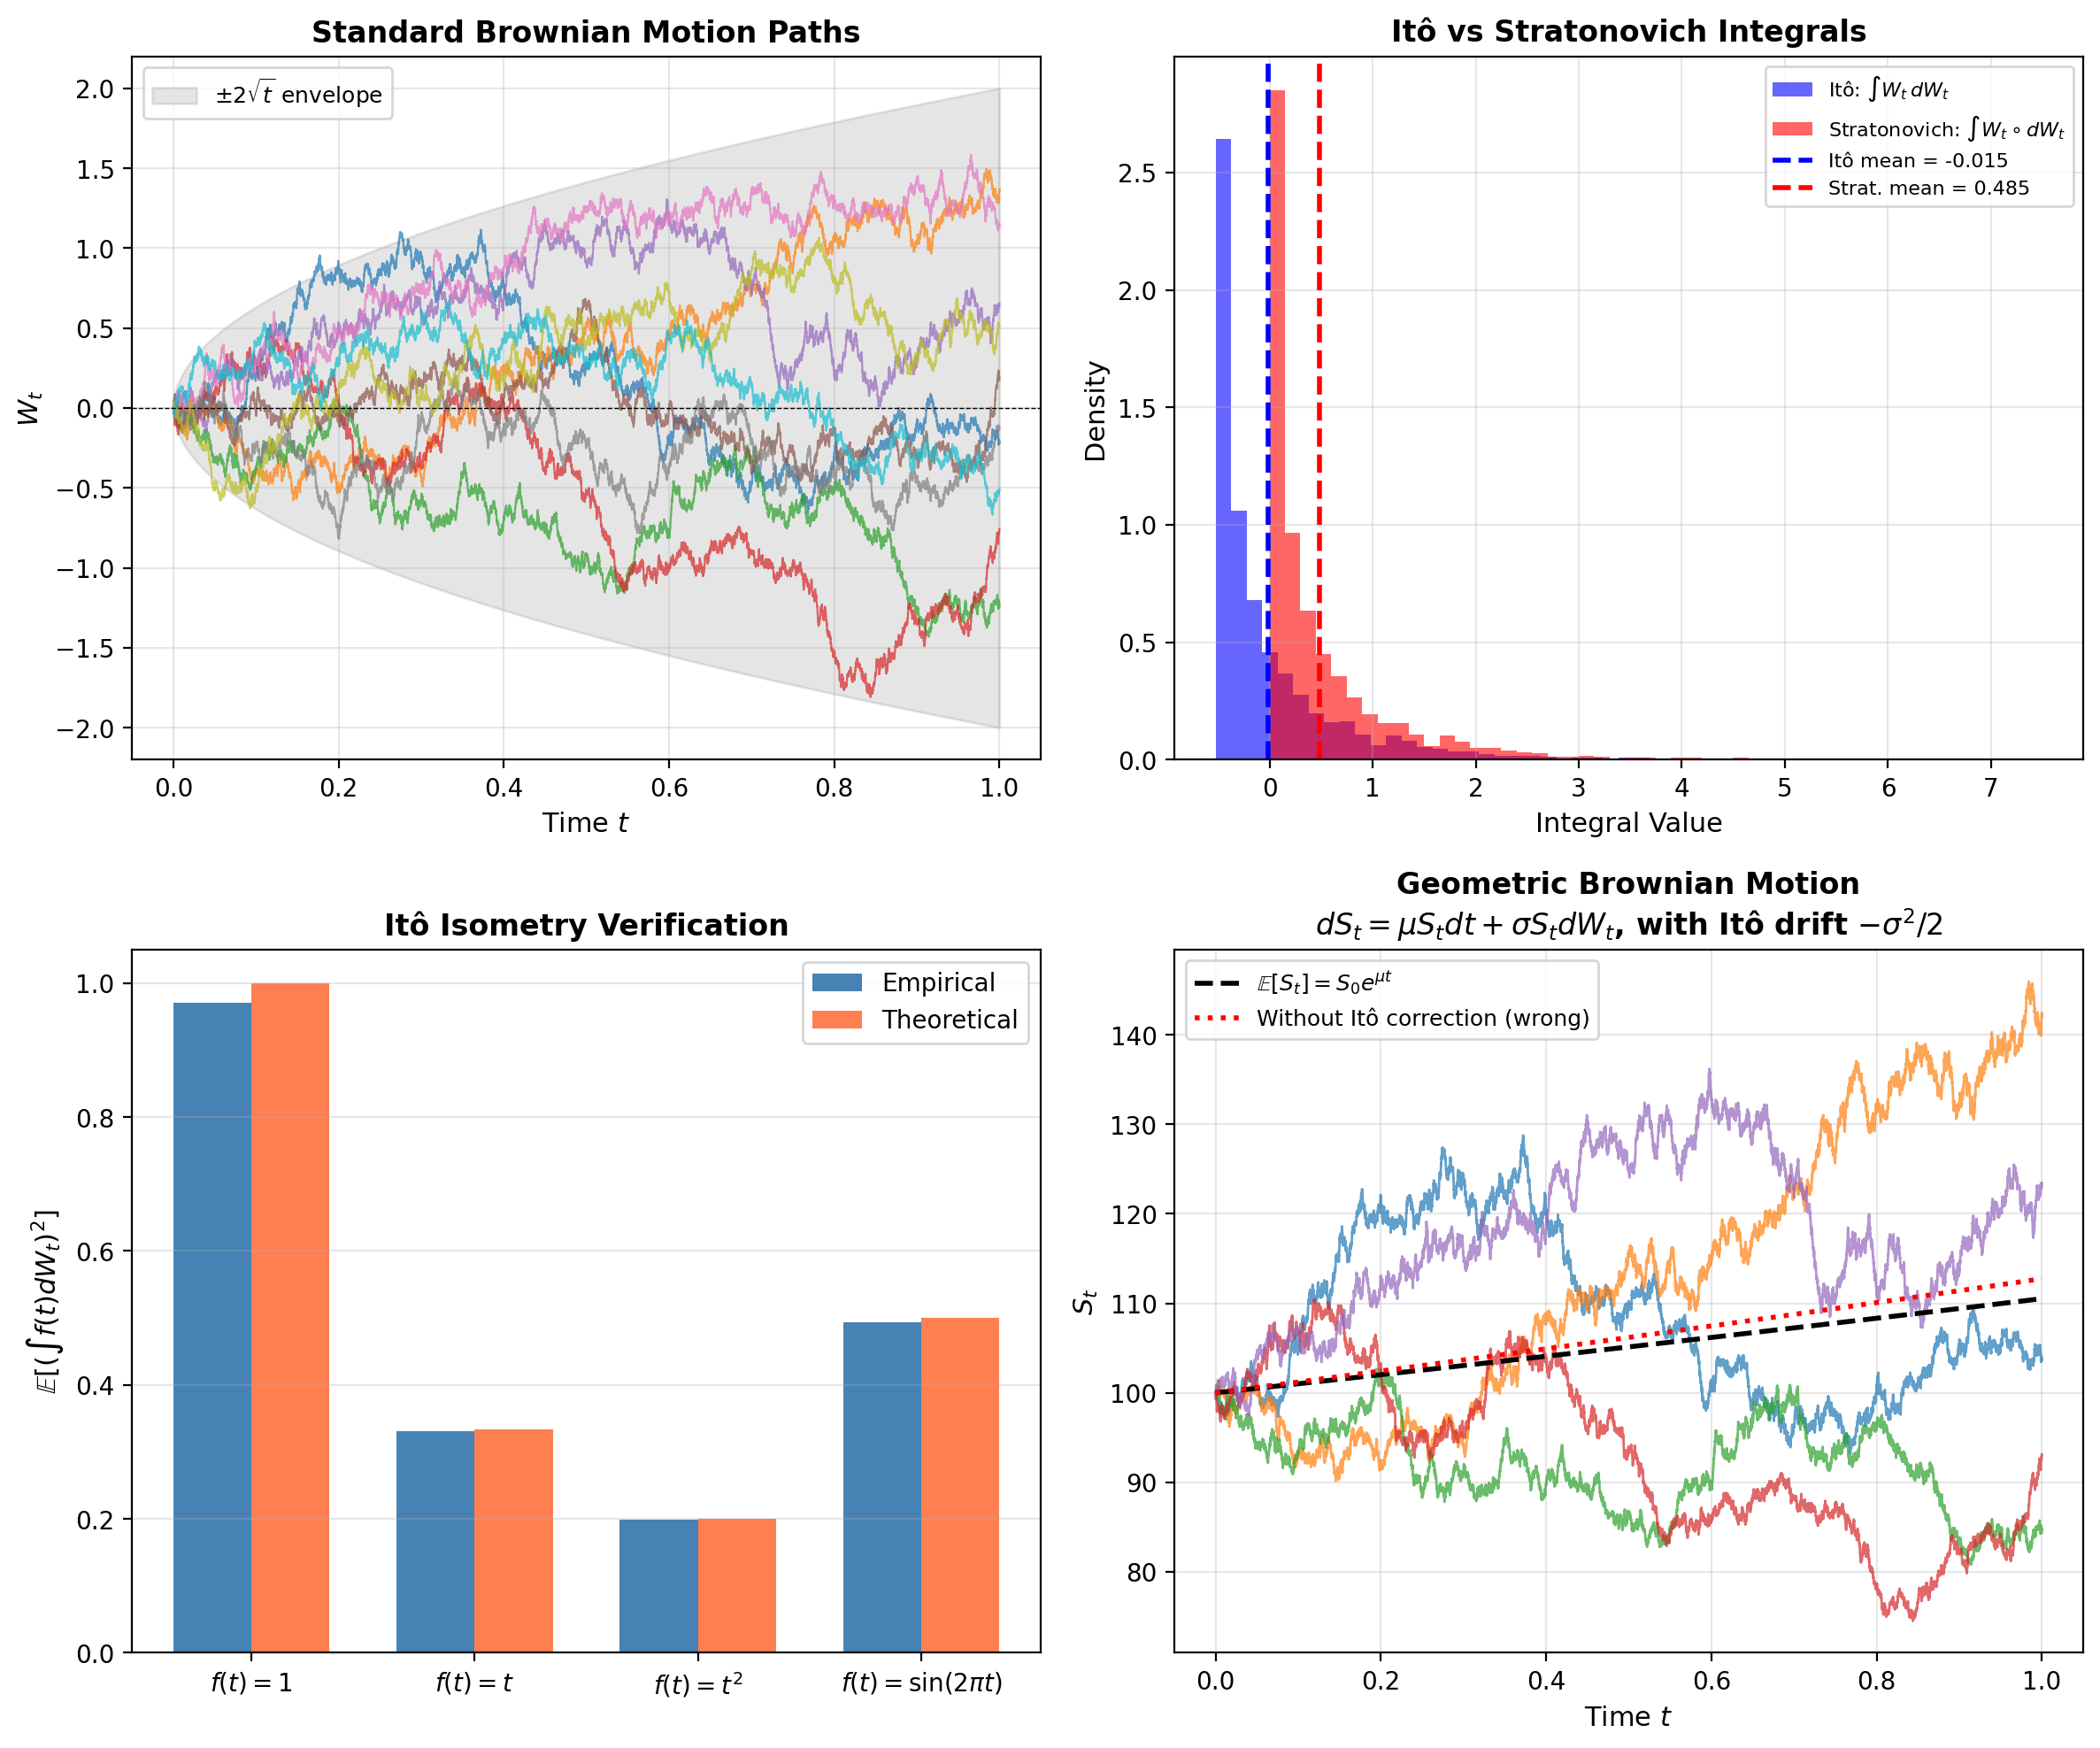


Figure saved to 'plot.png'


In [7]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Panel 1: Sample Brownian Motion Paths
ax1 = axes[0, 0]
n_display = 10
for i in range(n_display):
    ax1.plot(t, W[i], alpha=0.7, linewidth=0.8)
ax1.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax1.fill_between(t, -2*np.sqrt(t), 2*np.sqrt(t), alpha=0.2, color='gray', 
                  label=r'$\pm 2\sqrt{t}$ envelope')
ax1.set_xlabel('Time $t$', fontsize=11)
ax1.set_ylabel('$W_t$', fontsize=11)
ax1.set_title('Standard Brownian Motion Paths', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# Panel 2: Itô vs Stratonovich Integral Distributions
ax2 = axes[0, 1]
bins = 50
ax2.hist(ito_integral, bins=bins, density=True, alpha=0.6, 
         label=r'Itô: $\int W_t \, dW_t$', color='blue')
ax2.hist(strat_integral, bins=bins, density=True, alpha=0.6, 
         label=r'Stratonovich: $\int W_t \circ dW_t$', color='red')
ax2.axvline(x=ito_integral.mean(), color='blue', linestyle='--', linewidth=2,
            label=f'Itô mean = {ito_integral.mean():.3f}')
ax2.axvline(x=strat_integral.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Strat. mean = {strat_integral.mean():.3f}')
ax2.set_xlabel('Integral Value', fontsize=11)
ax2.set_ylabel('Density', fontsize=11)
ax2.set_title('Itô vs Stratonovich Integrals', fontsize=12, fontweight='bold')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

# Panel 3: Itô Isometry Verification
ax3 = axes[1, 0]
# Test isometry for different functions
test_functions = [
    (lambda t: np.ones_like(t), r'$f(t)=1$', T),
    (lambda t: t, r'$f(t)=t$', T**3/3),
    (lambda t: t**2, r'$f(t)=t^2$', T**5/5),
    (lambda t: np.sin(2*np.pi*t), r'$f(t)=\sin(2\pi t)$', 0.5),
]

empirical_vars = []
theoretical_vars = []
labels = []

for func, label, theo_var in test_functions:
    f_vals = func(t[:-1])
    integral = compute_ito_integral_with_f(f_vals, dW)
    empirical_vars.append(np.mean(integral**2))
    theoretical_vars.append(theo_var)
    labels.append(label)

x_pos = np.arange(len(labels))
width = 0.35
ax3.bar(x_pos - width/2, empirical_vars, width, label='Empirical', color='steelblue')
ax3.bar(x_pos + width/2, theoretical_vars, width, label='Theoretical', color='coral')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(labels, fontsize=10)
ax3.set_ylabel(r'$\mathbb{E}[(\int f(t) dW_t)^2]$', fontsize=11)
ax3.set_title('Itô Isometry Verification', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Panel 4: GBM with Itô Drift Correction
ax4 = axes[1, 1]
n_display = 5

# Show paths
for i in range(n_display):
    ax4.plot(t, S_exact[i], alpha=0.7, linewidth=1)

# Show theoretical expected value
E_St = S0 * np.exp(mu * t)
ax4.plot(t, E_St, 'k--', linewidth=2, label=r'$\mathbb{E}[S_t] = S_0 e^{\mu t}$')

# Show what you'd get without Itô correction (wrong!)
wrong_mean = S0 * np.exp((mu + 0.5*sigma**2) * t)
ax4.plot(t, wrong_mean, 'r:', linewidth=2, 
         label=r'Without Itô correction (wrong)')

ax4.set_xlabel('Time $t$', fontsize=11)
ax4.set_ylabel('$S_t$', fontsize=11)
ax4.set_title(f'Geometric Brownian Motion\n' + 
              r'$dS_t = \mu S_t dt + \sigma S_t dW_t$, with Itô drift $-\sigma^2/2$',
              fontsize=12, fontweight='bold')
ax4.legend(loc='upper left', fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ito_calculus_basics_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved to 'plot.png'")

## Summary

This notebook demonstrated the fundamental concepts of Itô calculus:

1. **Itô Integration**: Uses left-point evaluation, leading to the surprising result:
   $$\int_0^T W_t \, dW_t = \frac{1}{2}W_T^2 - \frac{1}{2}T$$

2. **Stratonovich Integration**: Uses midpoint evaluation, recovering ordinary calculus rules:
   $$\int_0^T W_t \circ dW_t = \frac{1}{2}W_T^2$$

3. **Itô Isometry**: A powerful tool for computing variances:
   $$\mathbb{E}\left[\left(\int_0^T f(t) \, dW_t\right)^2\right] = \int_0^T f(t)^2 \, dt$$

4. **Itô's Lemma**: The stochastic chain rule that introduces the crucial drift correction $-\frac{\sigma^2}{2}$ in geometric Brownian motion.

These tools form the mathematical foundation for continuous-time stochastic modeling in physics, finance, and engineering.